In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Ruta del archivo en Google Drive
file_path = "/content/drive/My Drive/DisneylandReviews.csv"


In [4]:
!pip install chardet


Análisis exploratorio de datos

In [5]:
import chardet

with open(file_path, "rb") as f:
    result = chardet.detect(f.read(100000))  # Leer una parte del archivo
    print(result)  # Esto te dirá la codificación correcta


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [6]:
df = pd.read_csv(file_path, encoding="ISO-8859-1")



Revisión general del dataset

In [65]:
df.info()  # Ver número de filas, columnas y tipos de datos
df.describe()  # Estadísticas generales de las variables numéricas
df.isnull().sum()  # Ver cuántos valores nulos hay por columna
df.head()  # Mostrar las primeras filas del dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Review_ID              42656 non-null  int64  
 1   Rating                 42656 non-null  int64  
 2   Year_Month             42656 non-null  object 
 3   Reviewer_Location      42656 non-null  object 
 4   Review_Text            42656 non-null  object 
 5   Branch                 42656 non-null  object 
 6   Sentiment              42656 non-null  float64
 7   Sentiment_Label        42656 non-null  object 
 8   Cleaned_Review         42656 non-null  object 
 9   Sentiment_Score        42656 non-null  float64
 10  TextBlob_Polarity      42656 non-null  float64
 11  TextBlob_Subjectivity  42656 non-null  float64
 12  VADER_Label            42656 non-null  object 
 13  TextBlob_Label         42656 non-null  object 
 14  Review_Segments        42656 non-null  object 
 15  Tr

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment,Sentiment_Label,Cleaned_Review,Sentiment_Score,TextBlob_Polarity,TextBlob_Subjectivity,VADER_Label,TextBlob_Label,Review_Segments,Truncated_Review,Tokenized_Review,Review_Length
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.243981,Positive,"[youve, ever, disneyland, anywhere, youll, fin...",0.7069,0.243981,0.561481,Positive,Positive,[if you ' ve ever been to disneyland anywhere ...,if you've ever been to disneyland anywhere you...,"[input_ids, attention_mask]",59
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.236131,Positive,"[since, last, time, visit, hk, disneyland, yet...",0.9901,0.236131,0.434649,Positive,Positive,[its been a while since d last time we visit h...,its been a while since d last time we visit hk...,"[input_ids, attention_mask]",171
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.160498,Positive,"[thanks, god, hot, humid, visiting, park, othe...",0.9920,0.160498,0.422944,Positive,Positive,[thanks god it wasn t too hot or too humid whe...,thanks god it wasn t too hot or too humid when...,"[input_ids, attention_mask]",169
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.189286,Positive,"[hk, disneyland, great, compact, park, unfortu...",0.8489,0.189286,0.512143,Positive,Positive,[hk disneyland is a great compact park. unfort...,hk disneyland is a great compact park. unfortu...,"[input_ids, attention_mask]",91
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.266667,Positive,"[location, city, took, around, 1, hour, kowlon...",0.2846,0.266667,0.437500,Positive,Positive,"[the location is not in the city, took around ...","the location is not in the city, took around 1...","[input_ids, attention_mask]",31


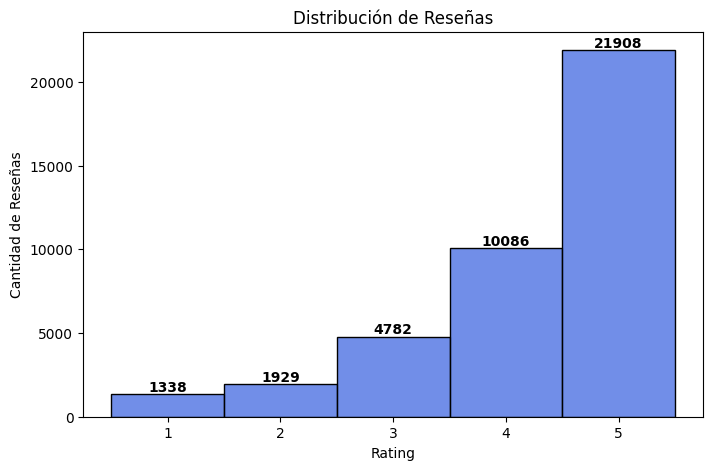

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.histplot(df["Rating"], bins=5, discrete=True, color="royalblue")

# Agregar etiquetas con la cantidad exacta en cada barra
for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.xlabel("Rating")
plt.ylabel("Cantidad de Reseñas")
plt.title("Distribución de Reseñas")
plt.show()




    Year_Month  Review_Count
0   2010-03-01             2
1   2010-04-01             1
2   2010-05-01             4
3   2010-06-01             8
4   2010-07-01             7
..         ...           ...
106 2019-01-01           211
107 2019-02-01           173
108 2019-03-01           218
109 2019-04-01           182
110 2019-05-01             2

[111 rows x 2 columns]


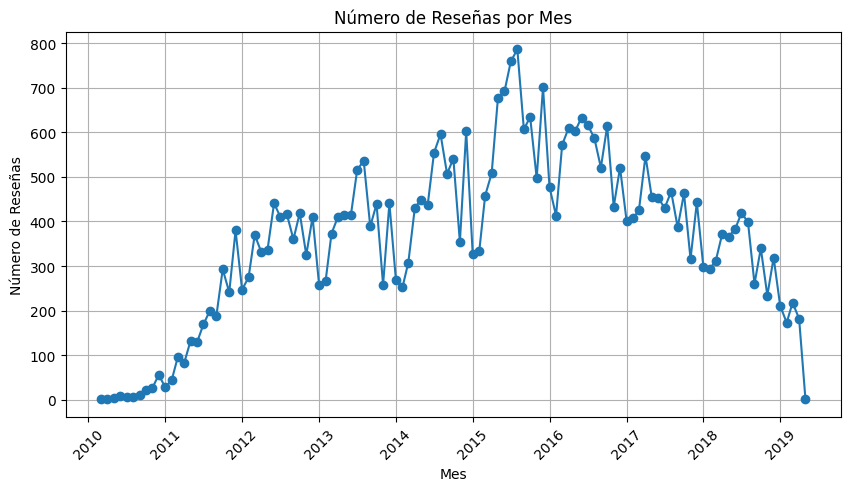

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna a datetime, manejando errores
df["Year_Month"] = pd.to_datetime(df["Year_Month"], format="%Y-%m", errors="coerce")

# Eliminar valores no válidos
df = df.dropna(subset=["Year_Month"])

# Contar reseñas por mes
reviews_per_month = df.groupby("Year_Month")["Review_ID"].count().reset_index()
reviews_per_month.columns = ["Year_Month", "Review_Count"]

# Mostrar la tabla
print(reviews_per_month)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(reviews_per_month["Year_Month"], reviews_per_month["Review_Count"], marker="o", linestyle="-")
plt.xlabel("Mes")
plt.ylabel("Número de Reseñas")
plt.title("Número de Reseñas por Mes")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



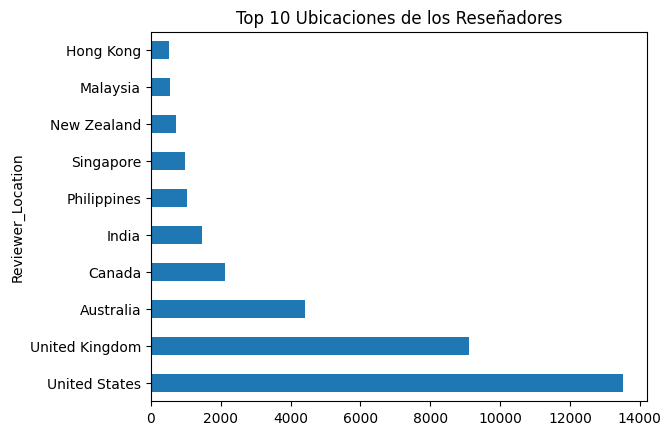

In [71]:
df["Reviewer_Location"].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 Ubicaciones de los Reseñadores")
plt.show()


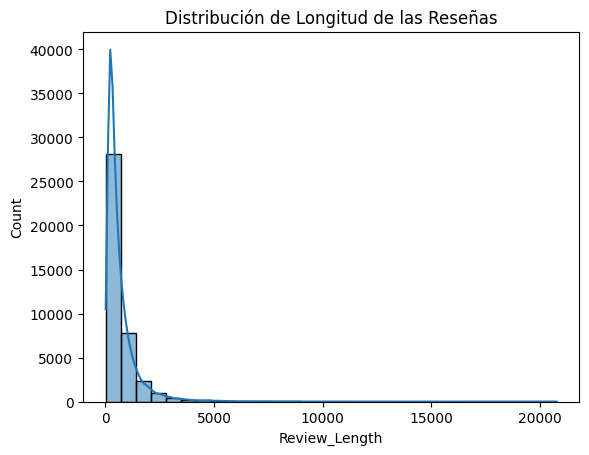

In [72]:
df["Review_Length"] = df["Review_Text"].str.len()
sns.histplot(df["Review_Length"], bins=30, kde=True)
plt.title("Distribución de Longitud de las Reseñas")
plt.show()


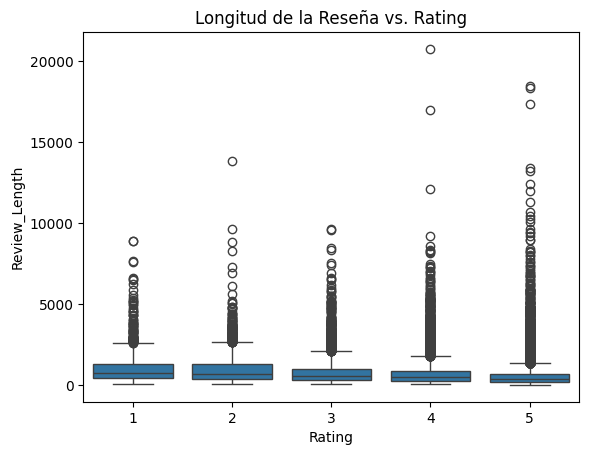

In [73]:
sns.boxplot(x="Rating", y="Review_Length", data=df)
plt.title("Longitud de la Reseña vs. Rating")
plt.show()


In [75]:
print(df["Branch"].nunique())  # Número de sucursales únicas
print(df["Branch"].value_counts())  # Conteo de reseñas por sucursal


3
Branch
Disneyland_California    18202
Disneyland_Paris         12694
Disneyland_HongKong       9147
Name: count, dtype: int64


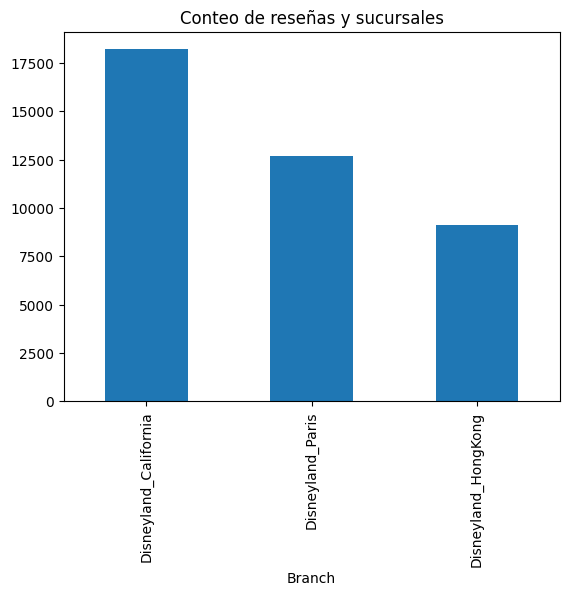

In [76]:
df["Branch"].value_counts().head(10).plot(kind="bar")
plt.title("Conteo de reseñas y sucursales")
plt.show()


In [64]:
df.info()  # Estructura y tipos de datos
df.describe()  # Estadísticas numéricas
df["Review_Text"].describe()  # Estadísticas solo de texto


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Review_ID              42656 non-null  int64  
 1   Rating                 42656 non-null  int64  
 2   Year_Month             42656 non-null  object 
 3   Reviewer_Location      42656 non-null  object 
 4   Review_Text            42656 non-null  object 
 5   Branch                 42656 non-null  object 
 6   Sentiment              42656 non-null  float64
 7   Sentiment_Label        42656 non-null  object 
 8   Cleaned_Review         42656 non-null  object 
 9   Sentiment_Score        42656 non-null  float64
 10  TextBlob_Polarity      42656 non-null  float64
 11  TextBlob_Subjectivity  42656 non-null  float64
 12  VADER_Label            42656 non-null  object 
 13  TextBlob_Label         42656 non-null  object 
 14  Review_Segments        42656 non-null  object 
 15  Tr

,Review_Text
count,42656
unique,42632
top,Let me just start off by saying that although ...
freq,2


In [14]:
df["Rating"].value_counts()


,count
Rating,
5,23146
4,10775
3,5109
2,2127
1,1499


Procesamiento de texto. Conteo de palabras más frecuentes

In [15]:
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()  # Convertir a minúsculas
    text = re.sub(r"[^\w\s]", "", text)  # Eliminar signos de puntuación
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Quitar stopwords
    return words

df["Cleaned_Review"] = df["Review_Text"].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Conteo de palabras repetidas

In [16]:
all_words = [word for review in df["Cleaned_Review"] for word in review]
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)  # Top 20 palabras más comunes
print(most_common_words)


[('park', 44244), ('disney', 35958), ('rides', 34248), ('disneyland', 32596), ('time', 29179), ('day', 28052), ('get', 22960), ('go', 20075), ('one', 19064), ('ride', 17624), ('great', 16302), ('would', 14590), ('kids', 14113), ('food', 14110), ('place', 13360), ('good', 13055), ('really', 12336), ('like', 11921), ('visit', 11693), ('see', 11659)]


Lematización

In [17]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import re

nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("stopwords")

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def clean_and_lemmatize(text):
    text = str(text).lower()  # Convertir a minúsculas
    text = re.sub(r"[^\w\s]", "", text)  # Eliminar signos de puntuación
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lematización y quitar stopwords
    return words

df["Cleaned_Review"] = df["Review_Text"].apply(clean_and_lemmatize)


Conteo de palabras después de lematizar

In [19]:
all_words = [word for review in df["Cleaned_Review"] for word in review]
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)  # Top 20 palabras más comunes
print(most_common_words)


[('park', 54126), ('ride', 51872), ('time', 37973), ('day', 36794), ('disney', 36695), ('disneyland', 33067), ('get', 24030), ('one', 21545), ('go', 20808), ('great', 16317), ('kid', 15904), ('place', 15579), ('would', 14590), ('food', 14365), ('line', 14292), ('year', 13198), ('good', 13129), ('show', 12847), ('queue', 12526), ('really', 12336)]


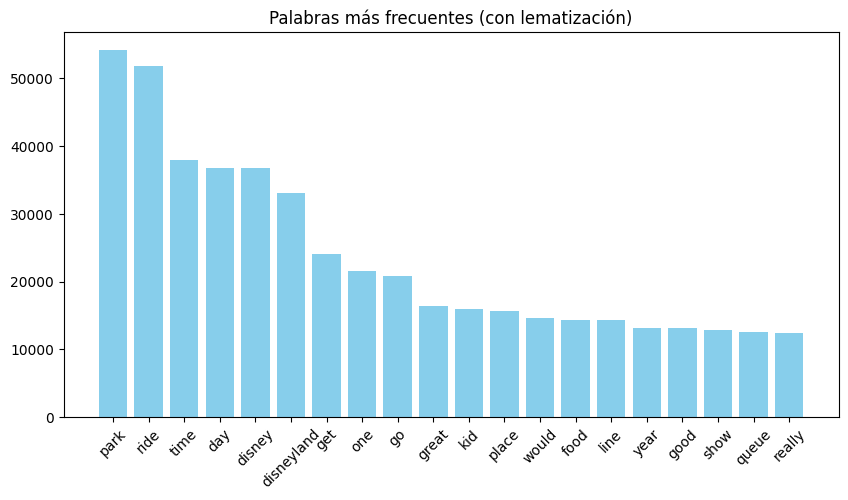

In [20]:
import matplotlib.pyplot as plt

words, counts = zip(*most_common_words)
plt.figure(figsize=(10,5))
plt.bar(words, counts, color="skyblue")
plt.xticks(rotation=45)
plt.title("Palabras más frecuentes (con lematización)")
plt.show()


 Análisis de Sentimiento en Reseñas de Disneyland

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  Sentiment  Count
0  Positive  35363
1  Negative   4003
2   Neutral    677


<ipython-input-78-724abe3ea2b7>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Sentiment_Label"], y=df["Rating"], palette="coolwarm")


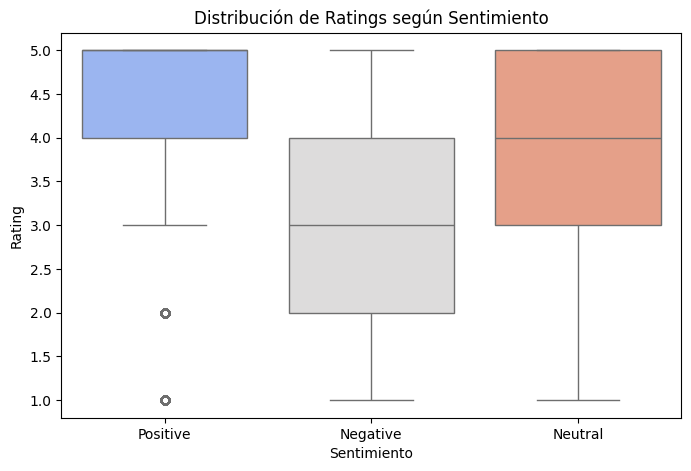

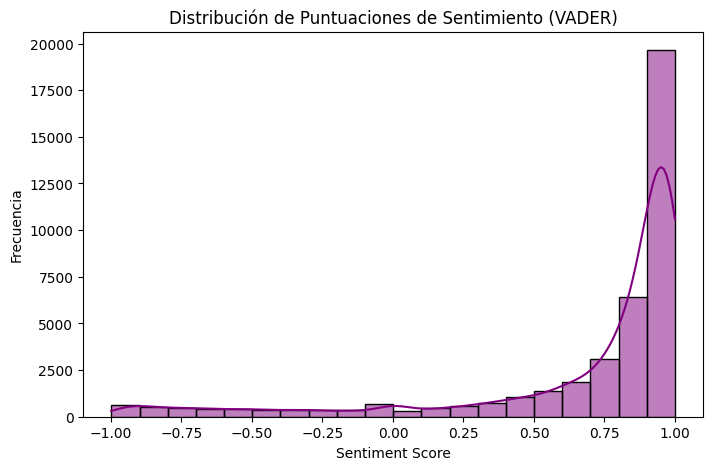

<ipython-input-78-724abe3ea2b7>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts["Sentiment"], y=sentiment_counts["Count"], palette="viridis")


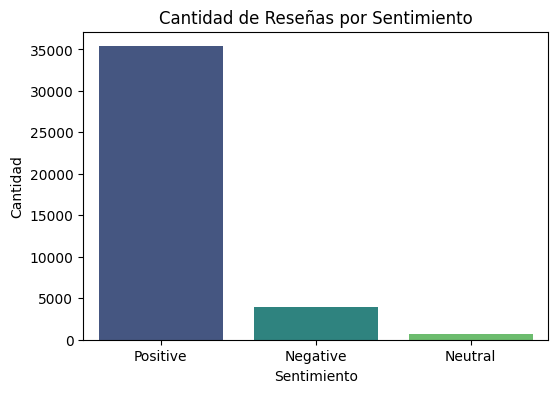

In [78]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Descargar lexicón de VADER
nltk.download("vader_lexicon")

# Inicializar analizador de sentimiento
sia = SentimentIntensityAnalyzer()

# Aplicar VADER para obtener la polaridad de cada reseña
df["Sentiment_Score"] = df["Review_Text"].apply(lambda text: sia.polarity_scores(str(text))["compound"])

# Función para categorizar sentimiento
def categorize_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment_Label"] = df["Sentiment_Score"].apply(categorize_sentiment)

# Aplicar TextBlob para obtener polaridad y subjetividad
df["TextBlob_Polarity"] = df["Review_Text"].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
df["TextBlob_Subjectivity"] = df["Review_Text"].apply(lambda text: TextBlob(str(text)).sentiment.subjectivity)

# Tabla resumen del conteo de sentimientos
sentiment_counts = df["Sentiment_Label"].value_counts().reset_index()
sentiment_counts.columns = ["Sentiment", "Count"]
print(sentiment_counts)

# Visualización 1: Boxplot de ratings según sentimiento
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Sentiment_Label"], y=df["Rating"], palette="coolwarm")
plt.title("Distribución de Ratings según Sentimiento")
plt.xlabel("Sentimiento")
plt.ylabel("Rating")
plt.show()

# Visualización 2: Histograma de puntuaciones de sentimiento
plt.figure(figsize=(8, 5))
sns.histplot(df["Sentiment_Score"], bins=20, kde=True, color="purple")
plt.title("Distribución de Puntuaciones de Sentimiento (VADER)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frecuencia")
plt.show()

# Visualización 3: Gráfico de barras del conteo de sentimientos
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts["Sentiment"], y=sentiment_counts["Count"], palette="viridis")
plt.title("Cantidad de Reseñas por Sentimiento")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")
plt.show()


In [21]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [22]:
df["Sentiment_Score"] = df["Review_Text"].apply(lambda text: sia.polarity_scores(str(text))["compound"])


In [23]:
def categorize_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment_Label"] = df["Sentiment_Score"].apply(categorize_sentiment)


<ipython-input-24-b44515903bf5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Sentiment_Label"], y=df["Rating"], palette="coolwarm")


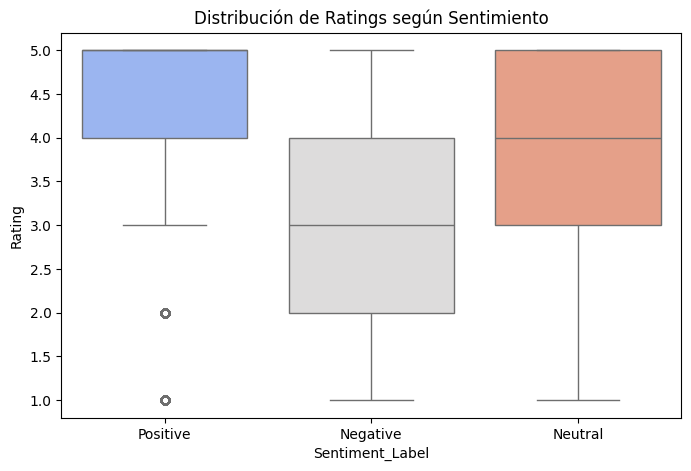

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=df["Sentiment_Label"], y=df["Rating"], palette="coolwarm")
plt.title("Distribución de Ratings según Sentimiento")
plt.show()


In [25]:
#análisis de polaridad y subjetividad
df["TextBlob_Polarity"] = df["Review_Text"].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
df["TextBlob_Subjectivity"] = df["Review_Text"].apply(lambda text: TextBlob(str(text)).sentiment.subjectivity)


Analizar inconsistencias


In [26]:
# Definir rating alto y bajo
high_rating = 4
low_rating = 2

# Casos donde el sentimiento no coincide con el rating
inconsistent_reviews = df[
    ((df["Rating"] >= high_rating) & (df["Sentiment_Label"] == "Negative")) |
    ((df["Rating"] <= low_rating) & (df["Sentiment_Label"] == "Positive"))
]

# Ver cuántas reseñas son inconsistentes
print(f"Total de reseñas inconsistentes: {len(inconsistent_reviews)}")

# Mostrar algunas filas
inconsistent_reviews[["Rating", "Review_Text", "Sentiment_Label"]].head(10)


Total de reseñas inconsistentes: 3349


,Rating,Review_Text,Sentiment_Label
8,2,"Feel so let down with this place,the Disneylan...",Positive
12,4,"We spend two days, the second day went early t...",Negative
28,5,We visited here on a Wednesday. We arrived for...,Negative
71,4,During a recent stop over in Hong Kong we paid...,Negative
72,4,We had an impromptu trip to Disneyland on a we...,Negative
79,2,I went to HK Disneyland on 5 April which happe...,Positive
93,5,This is the 10th time to Hong Kong Disneyland....,Negative
94,2,Didn t feel the Disney spirit in this place....,Positive
101,1,The main attractions were shut while we still ...,Positive
105,5,We tried to buy our tickets online the day bef...,Negative


ride: 1297
park: 1195
day: 921
time: 877
disney: 841
disneyland: 764
get: 597
one: 581
go: 505
line: 419
food: 414
kid: 385
people: 354
place: 348
queue: 333
year: 331
would: 326
show: 292
went: 284
really: 283


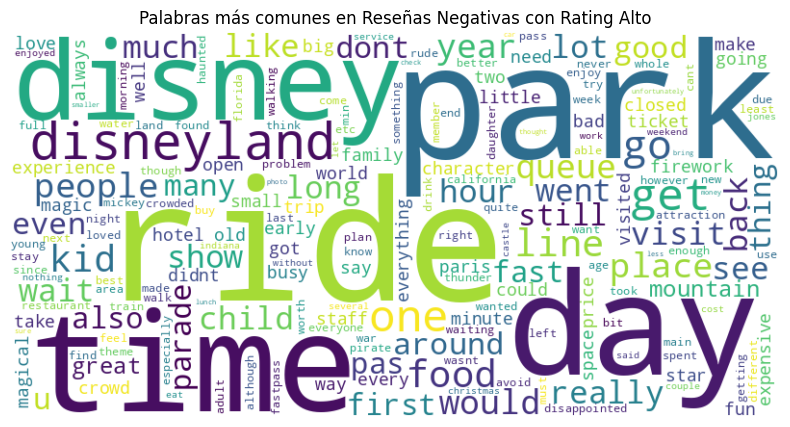

In [35]:
import nltk
from collections import Counter

# Definir umbral de "rating alto"
high_rating_threshold = 4

# Filtrar reseñas con rating alto y sentimiento negativo
negative_high_rating_reviews = df[(df["Rating"] >= high_rating_threshold) & (df["Sentiment_Label"] == "Negative")]

# Tokenizar y limpiar palabras
all_words_negative_high_rating = [
    word for review in negative_high_rating_reviews["Cleaned_Review"] for word in review
    if word.isalpha() and word not in stop_words  # Filtrar stopwords y caracteres no alfabéticos
]

# Contar frecuencia de palabras
word_freq_negative_high_rating = Counter(all_words_negative_high_rating)
most_common_words_negative_high_rating = word_freq_negative_high_rating.most_common(20)  # Top 20 palabras

# Mostrar resultado
for word, freq in most_common_words_negative_high_rating:
    print(f"{word}: {freq}")

# Crear nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_negative_high_rating)

# Graficar
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Palabras más comunes en Reseñas Negativas con Rating Alto")
plt.show()



Comparar VADER con TextBlob

      VADER  TextBlob  Count
0  Positive  Positive  34332
1  Positive   Neutral   2545
2  Negative  Positive   1545
3  Negative  Negative   1376
4  Negative   Neutral   1350
5  Positive  Negative    789
6   Neutral  Positive    369
7   Neutral   Neutral    211
8   Neutral  Negative    139


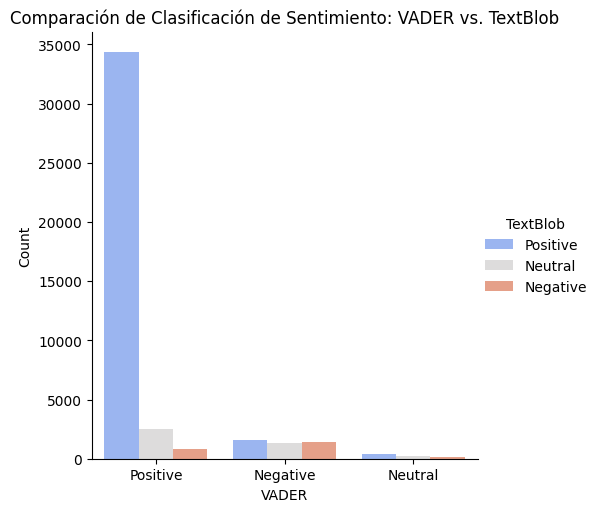

In [36]:
# Convertir Sentiment_Score de VADER en etiquetas (-1 a +1)
df["VADER_Label"] = df["Sentiment_Score"].apply(lambda x: "Positive" if x >= 0.05 else ("Negative" if x <= -0.05 else "Neutral"))

# Convertir polaridad de TextBlob en etiquetas (-1 a +1)
df["TextBlob_Label"] = df["TextBlob_Polarity"].apply(lambda x: "Positive" if x >= 0.05 else ("Negative" if x <= -0.05 else "Neutral"))

# Comparar la cantidad de cada categoría
comparison = df[["VADER_Label", "TextBlob_Label"]].value_counts().reset_index()
comparison.columns = ["VADER", "TextBlob", "Count"]
print(comparison)

# Visualizar con gráfico de barras
sns.catplot(data=comparison, kind="bar", x="VADER", hue="TextBlob", y="Count", palette="coolwarm")
plt.title("Comparación de Clasificación de Sentimiento: VADER vs. TextBlob")
plt.show()


<ipython-input-37-03e2eb7d626f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_discrepancias, x="VADER_Label", y="Rating", palette="coolwarm")


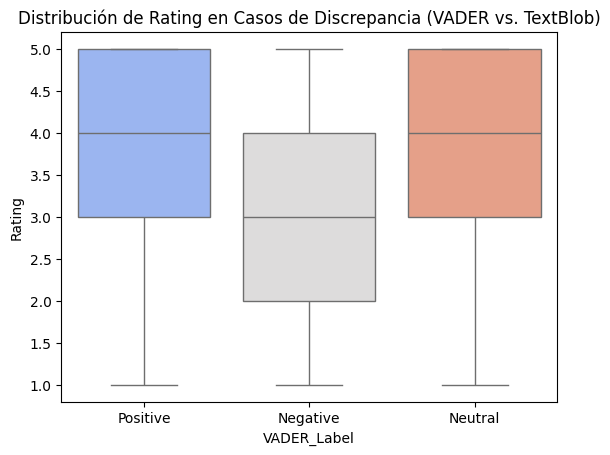

In [37]:
# Comparar casos donde VADER y TextBlob no coinciden
df_discrepancias = df[df["VADER_Label"] != df["TextBlob_Label"]]

# Revisar distribución de Rating en estos casos
sns.boxplot(data=df_discrepancias, x="VADER_Label", y="Rating", palette="coolwarm")
plt.title("Distribución de Rating en Casos de Discrepancia (VADER vs. TextBlob)")
plt.show()


Usar BERT y modelo preentrenado

In [38]:
!pip install transformers torch datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [39]:
from transformers import pipeline

# Cargar pipeline de análisis de sentimiento con BERT (modelo de Hugging Face)
sentiment_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [56]:
from transformers import AutoTokenizer

# Cargar el tokenizador de DistilBERT
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Función para tokenizar y truncar correctamente
def tokenize_truncate(text, max_length=512):
    return tokenizer(text, truncation=True, max_length=max_length, return_tensors="pt")

# Aplicar tokenización y truncamiento
df["Tokenized_Review"] = df["Review_Text"].apply(lambda x: tokenize_truncate(x))


In [58]:
df["Review_Length"] = df["Review_Text"].apply(lambda x: len(x.split()))
df[["Review_Text", "Review_Length"]].head()


,Review_Text,Review_Length
0,If you've ever been to Disneyland anywhere you...,59
1,Its been a while since d last time we visit HK...,171
2,Thanks God it wasn t too hot or too humid wh...,169
3,HK Disneyland is a great compact park. Unfortu...,91
4,"the location is not in the city, took around 1...",31


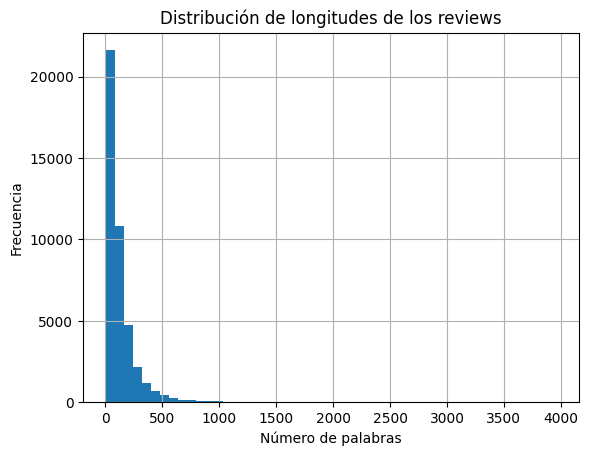

In [59]:
import matplotlib.pyplot as plt

df["Review_Length"].hist(bins=50)
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.title("Distribución de longitudes de los reviews")
plt.show()


In [62]:
from transformers import pipeline, AutoTokenizer

# Cargar modelo y tokenizer de ALBERT
model_name = "textattack/albert-base-v2-imdb"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_model = pipeline("sentiment-analysis", model=model_name, tokenizer=tokenizer)

# Función para truncar reseñas largas
def truncate_text(text, tokenizer, max_length=500):
    tokens = tokenizer.tokenize(text)  # Convertir a tokens
    if len(tokens) > max_length:
        tokens = tokens[:max_length]  # Truncar a 512 tokens
    return tokenizer.convert_tokens_to_string(tokens)  # Convertir de vuelta a texto

# Aplicar análisis de sentimiento con truncado
df["Truncated_Review"] = df["Review_Text"].apply(lambda x: truncate_text(x, tokenizer))
df["Sentiment"] = df["Truncated_Review"].apply(lambda x: sentiment_model(x)[0]['label'])


Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (663 > 512). Running this sequence through the model will result in indexing errors


KeyboardInterrupt: 

In [60]:
from transformers import pipeline

sentiment_model = pipeline("sentiment-analysis", model="textattack/albert-base-v2-imdb")
df["Sentiment"] = df["Review_Text"].apply(lambda x: sentiment_model(x)[0]['label'])


config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/46.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.7M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (665 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (665) must match the size of tensor b (512) at non-singleton dimension 1

In [57]:
df["BERT_Sentiment"] = df["Truncated_Review"].apply(lambda x: sentiment_model(x)[0]['label'])


RuntimeError: The size of tensor a (514) must match the size of tensor b (512) at non-singleton dimension 1

In [7]:
!pip install textblob
import pandas as pd
from textblob import TextBlob


In [8]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity  # Polaridad entre -1 (negativo) y 1 (positivo)

df["Sentiment"] = df["Review_Text"].apply(get_sentiment)


In [9]:
def categorize_sentiment(score):
    if score > 0:
        return "Positivo"
    elif score < 0:
        return "Negativo"
    else:
        return "Neutral"

df["Sentiment_Label"] = df["Sentiment"].apply(categorize_sentiment)


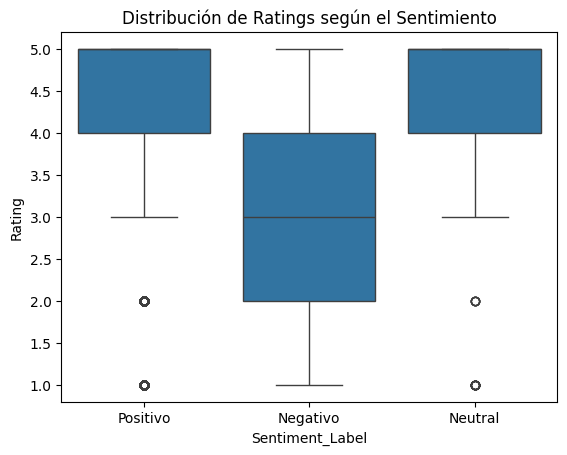

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Sentiment_Label"], y=df["Rating"])
plt.title("Distribución de Ratings según el Sentimiento")
plt.show()


In [11]:
df["Sentiment_Label"].value_counts()


,count
Sentiment_Label,
Positivo,38581
Negativo,3786
Neutral,289


In [12]:
df[["Rating", "Review_Text", "Sentiment_Label"]].sample(10)


,Rating,Review_Text,Sentiment_Label
16703,4,We enjoyed the new Star Tours and the changes ...,Positivo
34276,5,As we've visited Disney World in Florida sever...,Positivo
3800,5,A very professional world class production. T...,Positivo
34369,4,"The park definitely needs some updates, but it...",Positivo
13365,1,The lines were ridiculous!!! 2 to 2 1 2 hours!...,Negativo
42013,5,We have just returned from our 1st trip to Dis...,Negativo
1988,3,"It is summer, hot, humid but the kids still wa...",Positivo
38111,5,Family trip ( Of course !! ) and we really had...,Positivo
41023,5,Fantastic day out! Plan your day so you can ge...,Positivo
3111,3,Many China tourists everywhere..I went on a Ho...,Positivo
